In [1]:
#%matplotlib inline

#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
raw_data = '../data/rawdata/NYPD_Motor_Vehicle_Collisions.csv'

nyc_data = pd.read_csv(raw_data)

nyc_data.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,NaN,...,NaN,NaN,NaN,NaN,4098779,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4097559,Sedan,Garbage or Refuse,NaN,NaN,NaN
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4098023,Sedan,Sedan,NaN,NaN,NaN
3,03/16/2019,0:00,NaN,NaN,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4098377,Sedan,Taxi,NaN,NaN,NaN
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4097667,Sedan,Sedan,NaN,NaN,NaN


In [3]:
nyc_data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
#Examine data columns
#nyc_data.nunique()

## Notes on some of the questions we need to ask/answer?
* Where do car crashes happen in NYC?
* When do they happen?
* What are the common characteristics of crashes?
* Does the weather condition contribute to car crashes?
* Total number of accidents
* % of killed or injured by total
* Investigations into the increase and decrease in collisions in various boughs and why?
* difference in collisions by seasons 
* most dangerous, borough, ZIpcode, Street, car type, time to drive, weather(temperature and visibility level )
* safest borough, Zipcode, Street, car type and time to drive, weather(temperature and visibility level )
* Extreme weather events in nyc and how they affected collisions - case study
* group collisions by, day, hour, weekday, contributing factor (Distractions, Poor Driving, Physical alignment, Driving Under Influence, Car Defects, Outside influence)
* Note: view maps by buroghs, (motorists, cyclist, pedestrians)



In [4]:
#check data types
nyc_data.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [ ]:
#nyc_data.fillna(0)



In [5]:
#calculate totals of columns for deaths and injurues 
nyc_data["DEATHS"] = nyc_data["NUMBER OF PERSONS KILLED"] + nyc_data["NUMBER OF PEDESTRIANS KILLED"] + \
                    nyc_data["NUMBER OF CYCLIST KILLED"] + nyc_data["NUMBER OF MOTORIST KILLED"]

nyc_data["INJURIES"] = nyc_data["NUMBER OF PEDESTRIANS INJURED"] + nyc_data["NUMBER OF CYCLIST INJURED"] \
                        + nyc_data["NUMBER OF MOTORIST INJURED"]
nyc_data.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DEATHS,INJURIES
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,NaN,...,NaN,NaN,4098779,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0.0,0
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,NaN,...,NaN,NaN,4097559,Sedan,Garbage or Refuse,NaN,NaN,NaN,0.0,0
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,NaN,...,NaN,NaN,4098023,Sedan,Sedan,NaN,NaN,NaN,0.0,0
3,03/16/2019,0:00,NaN,NaN,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,4098377,Sedan,Taxi,NaN,NaN,NaN,0.0,0
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,NaN,...,NaN,NaN,4097667,Sedan,Sedan,NaN,NaN,NaN,0.0,1


In [ ]:
#plot deaths and injuries burrows deaths

In [6]:
#Where do car crashes happen in NYC?

#collisions by borough #
collision_by_boroughs = nyc_data['BOROUGH'].value_counts()

#calculate percentage of deaths and injuries
#group by boroughs
borough_gp = nyc_data.groupby('BOROUGH')

borough_deaths = pd.DataFrame(borough_gp['DEATHS'].sum())
#borough_deaths

borough_injuries = pd.DataFrame(borough_gp['INJURIES'].sum())
#borough_injuries

deaths_n_injuries = borough_deaths.join(borough_injuries, how='left')

deaths_n_injuries = deaths_n_injuries.reset_index()
#tot_deaths = deaths_n_injuries['DEATHS'].sum()
#tot_injuries = deaths_n_injuries['INJURIES'].sum()

deaths_n_injuries



,BOROUGH,DEATHS,INJURIES
0,BRONX,306.0,39948
1,BROOKLYN,713.0,91891
2,MANHATTAN,414.0,43207
3,QUEENS,668.0,70425
4,STATEN ISLAND,122.0,11148


In [7]:
#concat date and time columns for easy analysis
nyc_data['COLLISION DATE'] = nyc_data['DATE'] + ' ' + nyc_data['TIME']
#nyc_data.head()
nyc_data['COLLISION DATE'] = pd.to_datetime(nyc_data['COLLISION DATE'])


In [8]:
#check data types
nyc_data.dtypes

DATE                                     object
TIME                                     object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [20]:
nyc_data['YEAR'] = nyc_data['COLLISION DATE'].dt.year
nyc_data['MONTH'] = nyc_data['COLLISION DATE'].dt.month
nyc_data['DAY'] = nyc_data['COLLISION DATE'].dt.weekday_name
nyc_data['HOUR'] = nyc_data['COLLISION DATE'].dt.hour
nyc_data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DEATHS,INJURIES,COLLISION DATE,Year,MONTH,YEAR,DAY,HOUR
0,03/16/2019,0:00,BROOKLYN,11208,40.681927,-73.870720,"(40.681927, -73.87072)",ATLANTIC AVENUE,HEMLOCK STREET,NaN,...,NaN,NaN,0.0,0,2019-03-16,2019,3,2019,Saturday,0
1,03/16/2019,0:00,MANHATTAN,10016,40.749100,-73.984085,"(40.7491, -73.984085)",5 AVENUE,WEST 35 STREET,NaN,...,NaN,NaN,0.0,0,2019-03-16,2019,3,2019,Saturday,0
2,03/16/2019,0:00,QUEENS,11412,40.696064,-73.763084,"(40.696064, -73.763084)",MEXICO STREET,DORMANS ROAD,NaN,...,NaN,NaN,0.0,0,2019-03-16,2019,3,2019,Saturday,0
3,03/16/2019,0:00,NaN,NaN,40.841843,-73.945390,"(40.841843, -73.94539)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,0.0,0,2019-03-16,2019,3,2019,Saturday,0
4,03/16/2019,0:00,BRONX,10451,40.811733,-73.926700,"(40.811733, -73.9267)",MORRIS AVENUE,EAST 139 STREET,NaN,...,NaN,NaN,0.0,1,2019-03-16,2019,3,2019,Saturday,0


In [33]:
coll_by_yr = nyc_data['YEAR'].value_counts().sort_index()
coll_by_yr

2012    100541
2013    203729
2014    206029
2015    217693
2016    229784
2017    230994
2018    231435
2019     41909
Name: YEAR, dtype: int64

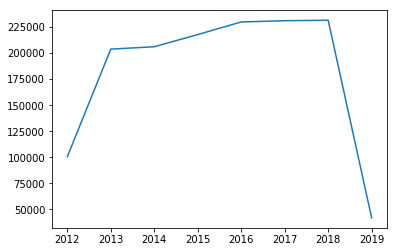

In [34]:
coll_by_yr.plot()

In [35]:
coll_by_mnt = nyc_data['MONTH'].value_counts().sort_index()
coll_by_mnt

1     119020
2     109682
3     116790
4     104173
5     118050
6     118285
7     130045
8     128430
9     128167
10    133354
11    127141
12    128977
Name: MONTH, dtype: int64

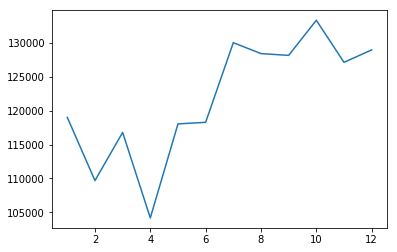

In [36]:
coll_by_mnt.plot()

In [37]:
coll_by_wkday = nyc_data['DAY'].value_counts().sort_index()
coll_by_wkday

Friday       234077
Monday       209392
Saturday     194265
Sunday       171425
Thursday     220243
Tuesday      217331
Wednesday    215381
Name: DAY, dtype: int64

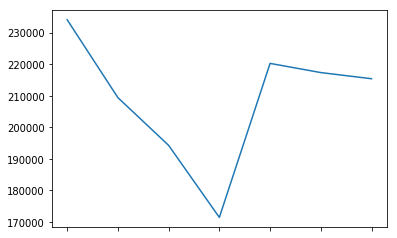

In [38]:
coll_by_wkday.plot()

In [39]:
coll_by_hr = nyc_data['HOUR'].value_counts().sort_index()
coll_by_hr

0      41303
1      22765
2      17242
3      14931
4      17476
5      19214
6      30634
7      42208
8      82469
9      81020
10     74631
11     77401
12     81972
13     86329
14    100182
15     91785
16    108927
17    105853
18     92685
19     75368
20     62100
21     51491
22     46319
23     37809
Name: HOUR, dtype: int64

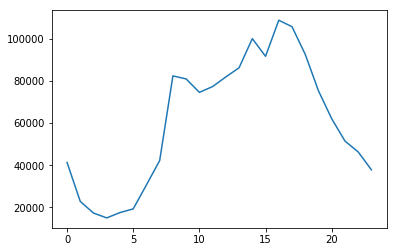

In [40]:
coll_by_hr.plot()

In [ ]:
#categorize and calulate category percentages contributing factor
#nyc_data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

In [ ]:
#nyc_data['DATE'].value_counts()
nyc_data['DATE'].describe()

In [ ]:
#nyc_data['ZIP CODE'].value_counts()

In [ ]:
nyc_data['VEHICLE TYPE CODE 1'].value_counts()

In [ ]:
nyc_data['VEHICLE TYPE CODE 2'].value_counts()

In [ ]:
nyc_data['VEHICLE TYPE CODE 3'].value_counts()

In [ ]:
nyc_data['TIME'].value_counts()

In [ ]:
nyc_data['NUMBER OF PERSONS KILLED'].value_counts()

In [ ]:
nyc_data['NUMBER OF PERSONS INJURED'].value_counts()